In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_original = pd.read_csv('Original_Mexico.csv')
df = df_original.copy()
df.shape

(26401, 79)

In [18]:
# Filtrar columnas NO cuantitativas (excluyendo int y float)
df_cualitativas = df.select_dtypes(exclude=['int64', 'float64'])
print("Columnas cualitativas:", df_cualitativas.columns)

Columnas cualitativas: Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')


In [19]:
#Convertir columnas seleccionadas cualitativas a cuantitativas 
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\vbece\AppData\Local\Temp\ipykernel_9104\2798433981.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [20]:
#Verificamos que salgan en el df las columnas convertidas
df_cuantitativas = df.select_dtypes(include=['int64', 'float64'])
df_cuantitativas.shape

(26401, 49)

In [21]:
#Aplicación de la mean para los valores nulos en las columnas cuantitativas
cuantitativas = df_cuantitativas.fillna(df_cuantitativas.mean(numeric_only=True))

In [22]:
#Verificamos valores nulos 
columnas_Nulas= cuantitativas.isnull().sum()
#Observamos que columasn tienen valores nulos 
columnas_con_nulos = columnas_Nulas[columnas_Nulas > 0]
columnas_con_nulos

neighbourhood_group_cleansed    26401
calendar_updated                26401
license                         26401
dtype: int64

In [23]:
#Eliminamos columnas que no tienen ningun registro
cuantitativas = cuantitativas.drop(['neighbourhood_group_cleansed','calendar_updated','license'], axis=1)

In [24]:
#Verificamos valores nulos 
cuantitativas.isnull().sum().sum()

np.int64(0)

In [29]:
#TODAS LAS COLUMNAS CUANTITATIVAS 
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y= cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5 * iqr
Limite_Inferior_iqr = percentile25 - 1.5 * iqr

print("Límite superior permitido (por columna):") 
print(Limite_Superior_iqr)
print("--------------------------------")
print("Límite inferior permitido (por columna):") 
print(Limite_Inferior_iqr)

# Sustituir outliers por los límites (winsorización)
# CORRECCIÓN: Se cambiaron los nombres de las variables a las correctas (añadiendo 'r' al final)
y_winsor = y.clip(lower=Limite_Inferior_iqr, 
                  upper=Limite_Superior_iqr, 
                  axis=1) # axis=1 es crucial para aplicar el límite correcto a cada columna

Límite superior permitido (por columna):
id                                              2.870210e+18
scrape_id                                       2.025063e+13
host_id                                         9.588428e+08
host_response_rate                              1.086960e+00
host_acceptance_rate                            1.167196e+00
host_is_superhost                               2.500000e+00
host_listings_count                             3.850000e+01
host_total_listings_count                       4.700000e+01
latitude                                        1.949191e+01
longitude                                      -9.911702e+01
accommodates                                    7.000000e+00
bathrooms                                       2.250000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.939731e+03
minimum_nights                              

In [31]:
y_winsor.isnull().sum().sum()

np.int64(0)

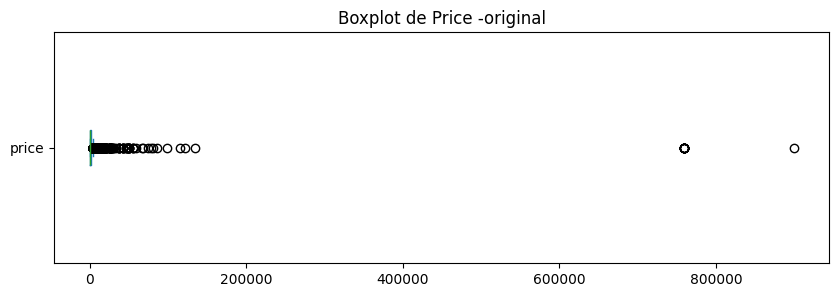

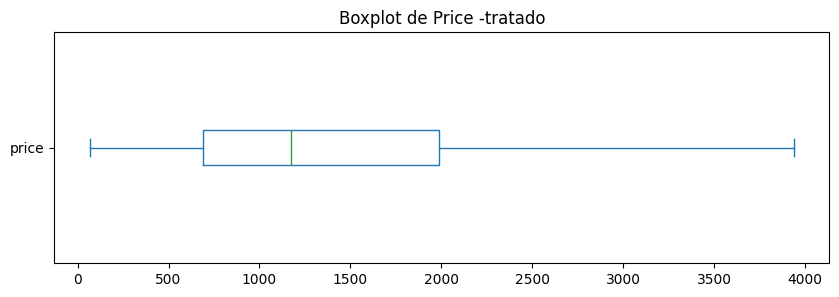

In [32]:
#Verificamos el tratado de los outliers 
fig = plt.figure(figsize =(10, 3))
cuantitativas['price'].plot(kind='box', vert=False)
plt.title('Boxplot de Price -original')
plt.show()

fig = plt.figure(figsize =(10, 3))
y_winsor['price'].plot(kind='box', vert=False)
plt.title('Boxplot de Price -tratado')
plt.show()

In [35]:
#Verificamos que room_type no tenga nulos 
df[['room_type']].isnull().sum()

room_type    0
dtype: int64

In [36]:
#Unimos datafrmae procesado con la columna 'room_type' 
type = df[['room_type']]
db = pd.concat([y_winsor, type], axis=1)
db.shape

(26401, 47)

In [37]:
#Verificamos valores nulos
db.isnull().sum().sum()

np.int64(0)

In [38]:
#Exportamos el dataframe final a un nuevo CSV
db.to_csv('Mexico_Limpio.csv', index=False)

PROCESO VIEJO

In [103]:
#Creación de df según su procesamiento de valores nulos
            #Trato de valores nulos por la mediana
dfM = df[['maximum_maximum_nights','minimum_maximum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights', 'host_total_listings_count',
          'host_listings_count', 'price', 'estimated_revenue_l365d', 'reviews_per_month', 'beds', 'bedrooms', 'bathrooms', 'host_response_rate', 'host_acceptance_rate']]

            #Tratar los valores nulos por la media
dfMM = df[['bathrooms', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
            'review_scores_communication','review_scores_location', 'review_scores_value']]

#Procesamiento de valores
dfM = dfM.fillna(dfM.median(numeric_only=True))
dfMM = dfMM.fillna(dfMM.mean(numeric_only=True))

#Verificamos que ya no haya valores nulos en los dataframes
nulosM = dfM.isnull().sum().sum()
nulosMM = dfMM.isnull().sum().sum()
print("Valores nulos en df sustituido por mediana:", nulosM)
print("Valores nulos en df sustituido por media:", nulosMM)


Valores nulos en df sustituido por mediana: 0
Valores nulos en df sustituido por media: 0


In [104]:
# Reemplazar columnas en el DataFrame original
df.update(dfM)
df.update(dfMM)

In [ ]:
#Identificar valores nulos por el data frame esepcificado
nulos = df_cuantitativas.isnull().sum().sum()
print( 'Los valores nulos del las columnas cuantitativas son:', nulos)

#Resumen completo de valores por columna - Código proporcionado por IA
df_cuantitativas = pd.DataFrame({
    'Registros Limpios': df_cuantitativas.notna().sum(),
    'Nulos': df_cuantitativas.isna().sum(),
    'Tipo': df_cuantitativas.dtypes
})

# Filtrar solo columnas con nulos de menor a mayor 
df_nulos = df_cuantitativas[df_cuantitativas['Nulos'] > 0].sort_values(by='Nulos', ascending=True)
df_nulos

In [105]:
#Identificar valores nulos por el data frame esepcificado
verificacion = df.copy()
nulos1 = verificacion.isnull().sum().sum()
print( 'Los valores nulos son:', nulos1)

#Resumen completo de valores por columna - Código proporcionado por IA
verificacion = pd.DataFrame({
    'Registros Limpios': verificacion.notna().sum(),
    'Nulos': verificacion.isna().sum(),
    'Tipo': verificacion.dtypes
})

# Filtrar solo columnas con nulos de menor a mayor 
dfnulos = verificacion[verificacion['Nulos'] > 0].sort_values(by='Nulos', ascending=True)
dfnulos

Los valores nulos son: 155301


,Registros Limpios,Nulos,Tipo
bathrooms_text,26370,31,object
description,25633,768,object
host_name,25544,857,object
host_since,25487,914,object
host_has_profile_pic,25487,914,object
host_verifications,25487,914,object
host_picture_url,25487,914,object
host_identity_verified,25487,914,object
host_thumbnail_url,25487,914,object
has_availability,25401,1000,object


In [110]:
#unimos ambos dataframes ya procesados
df_FINAL = pd.concat([data0, cualitativas], axis=1)
df_FINAL.shape

(26401, 79)

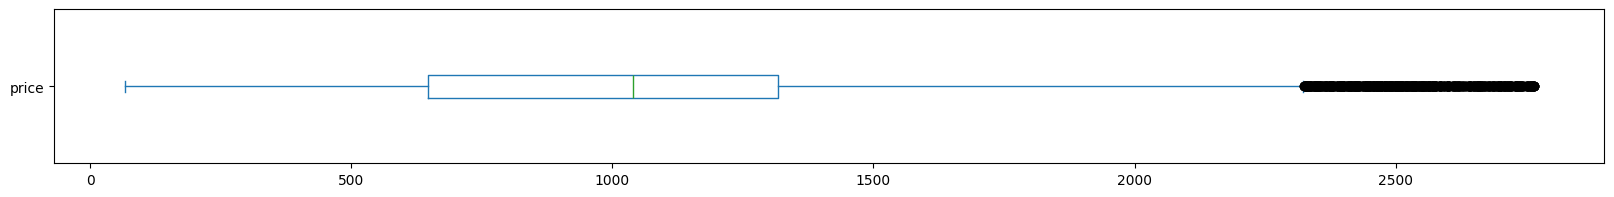

In [111]:
#Verificamos que outliers
fig = plt.figure(figsize =(20, 2))
df_FINAL['price'].plot(kind='box', vert=False)
plt.show()


In [ ]:
#Creación de df con variables necesarias para actividad 1
variables = df[['room_type','host_acceptance_rate', 'host_response_rate', 'price', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'availability_365', 'reviews_per_month', 'review_scores_communication']]

#Identificar valores nulos por el data frame esepcificado
nulos = variables.isnull().sum().sum()
print( 'Los valores nulos del data frame son:', nulos)

#Resumen completo de valores por columna - Código proporcionado por IA
valores = pd.DataFrame({
    'Total': len(df),
    'Registros Limpios': variables.notna().sum(),
    'Nulos': variables.isna().sum(),
    'Tipo': variables.dtypes
})

# Filtrar solo columnas con nulos de menor a mayor 
df_nulos = valores[valores['Nulos'] > 0].sort_values(by='Nulos', ascending=True)
df_nulos

Los valores nulos del data frame son: 21691


,Total,Registros Limpios,Nulos,Tipo
price,26401,23127,3274,object
review_scores_rating,26401,23028,3373,float64
reviews_per_month,26401,23028,3373,float64
review_scores_communication,26401,23026,3375,float64
host_acceptance_rate,26401,22791,3610,object
host_response_rate,26401,21715,4686,object


_____________________________________________

VALORES NULOS EN VARIABLES NECESARIAS
_____________________________________________

In [ ]:
#Conocimiento de la columna  'review_scores_communication' (3,375 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', variables['review_scores_communication'].nunique())
    #Lista de valores únicos
#print('Lista de valores únicos de la columna:',variables['review_scores_communication'].unique())
    #Sustitución de valores con la media de la columna
variables['review_scores_communication'] = variables['review_scores_communication'].fillna(variables['review_scores_communication'].mean())
print('Los valores nulos que contiene la columna:',variables['review_scores_communication'].isna().sum())

El número de valores únicos de la columna: 150
Los valores nulos que contiene la columna: 0


C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\2539178912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['review_scores_communication'] = variables['review_scores_communication'].fillna(variables['review_scores_communication'].mean())


In [ ]:
#Conocimiento de la columna  'reviews_per_month' (3,373 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', variables['reviews_per_month'].nunique())
    #Lista de valores únicos
#print('Lista de valores únicos de la columna:',variables['review_scores_rating'].unique())
    #Sustitución de valores con la media de la columna
variables['reviews_per_month'] = variables['reviews_per_month'].fillna(variables['reviews_per_month'].mean())
print('Los valores nulos que contiene la columna:',variables['reviews_per_month'].isna().sum())

El número de valores únicos de la columna: 1004
Los valores nulos que contiene la columna: 0


C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\2599395850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['reviews_per_month'] = variables['reviews_per_month'].fillna(variables['reviews_per_month'].mean())


In [ ]:
#Conocimiento de la columna  'review_scores_rating' (3,373 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', variables['review_scores_rating'].nunique())
    #Lista de valores únicos
#print('Lista de valores únicos de la columna:',variables['review_scores_rating'].unique())
    #Sustitución de valores con la media de la columna
variables['review_scores_rating'] = variables['review_scores_rating'].fillna(variables['review_scores_rating'].mean())
print('Los valores nulos que contiene la columna:',variables['review_scores_rating'].isna().sum())

El número de valores únicos de la columna: 151
Los valores nulos que contiene la columna: 0


C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\2870611046.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['review_scores_rating'] = variables['review_scores_rating'].fillna(variables['review_scores_rating'].mean())


In [ ]:
#Conocimiento de la columna  'host_response_rate' (4,686 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', variables['host_response_rate'].nunique())
    #Lista de valores únicos
#print('Lista de valores únicos de la columna:',variables['host_response_rate'].unique())
   #Sustitución de valores con un valoren concreto
variables['host_response_rate'] = variables['host_response_rate'].fillna('Not specified')
print('Los valores nulos que contiene la columna:',variables['host_response_rate'].isna().sum())

El número de valores únicos de la columna: 65
Los valores nulos que contiene la columna: 0


C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\1610369705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['host_response_rate'] = variables['host_response_rate'].fillna('Not specified')


In [ ]:
#Conocimiento de la columna  'host_acceptance_rate' (3,610 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', variables['host_acceptance_rate'].nunique())
    #Lista de valores únicos
#print('Lista de valores únicos de la columna:',variables['host_acceptance_rate'].unique())
   #Sustitución de valores con un valoren concreto
variables['host_acceptance_rate'] = variables['host_acceptance_rate'].fillna('Not specified')
print('Los valores nulos que contiene la columna:',variables['host_acceptance_rate'].isna().sum())

El número de valores únicos de la columna: 100
Los valores nulos que contiene la columna: 0


C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\356836868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['host_acceptance_rate'] = variables['host_acceptance_rate'].fillna('Not specified')


In [ ]:
#Conocimiento de la columna  'price' (3,274 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', variables['price'].nunique())
    #Lista de valores únicos
#print('Lista de valores únicos de la columna:',variables['price'].unique())
    #Convertimos a float la columan 
variables['price'] = variables['price'].replace('[\$,]', '', regex=True).astype(float)
    #Sustitución de valores con la media de la columna
variables['price'] = variables['price'].fillna(variables['price'].mean())
print('Los valores nulos que contiene la columna:',variables['price'].isna().sum())

El número de valores únicos de la columna: 3957
Los valores nulos que contiene la columna: 0


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\2786918129.py:7: SyntaxWarning: invalid escape sequence '\$'
  variables['price'] = variables['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\2786918129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['price'] = variables['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\vbece\AppData\Local\Temp\ipykernel_13644\2786918129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
#Verificamos si existe algún valor nulo en el data frame
variables.isna().sum().sum()

np.int64(0)

In [ ]:
#Exportamos la base de datos con las columas seleccionadas sin valrores nulos
#variables.to_csv('Base_Act1.csv', index=False)

_____________________________________________

VALORES NULOS 
_____________________________________________

In [3]:
#Identificar valores nulos por el data frame
valores_nulos = df.isnull().sum().sum()
print( 'Los valores nulos del data frame son:', valores_nulos)

#Resumen completo de valores por columna - Código proporcionado por IA
valores = pd.DataFrame({
    'Total': len(df),
    'Registro Limpio': df.notna().sum(),
    'Nulos': df.isna().sum(),
    'Tipo': df.dtypes
})

# Filtrar solo columnas con nulos de menor a mayor 
valores_con_nulos = valores[valores['Nulos'] > 0].sort_values(by='Nulos', ascending=True)
valores_con_nulos

Los valores nulos del data frame son: 206551


,Total,Registro Limpio,Nulos,Tipo
minimum_minimum_nights,26401,26381,20,float64
maximum_minimum_nights,26401,26381,20,float64
minimum_maximum_nights,26401,26381,20,float64
maximum_maximum_nights,26401,26381,20,float64
bathrooms_text,26401,26370,31,object
description,26401,25633,768,object
host_name,26401,25544,857,object
host_since,26401,25487,914,object
host_listings_count,26401,25487,914,float64
host_identity_verified,26401,25487,914,object


TRATO DE COLUMNAS TIPO OBJECT

In [ ]:
# Filtrar columnas de tipo object dentro de valores_con_nulos
valores_object = valores_con_nulos[valores_con_nulos['Tipo'] == 'object']
valores_object

,Num_filas,Num_nulos,Nulos,Tipo
bathrooms_text,26401,26370,31,object
description,26401,25633,768,object
host_name,26401,25544,857,object
host_since,26401,25487,914,object
host_identity_verified,26401,25487,914,object
host_has_profile_pic,26401,25487,914,object
host_verifications,26401,25487,914,object
host_thumbnail_url,26401,25487,914,object
host_picture_url,26401,25487,914,object
has_availability,26401,25401,1000,object


In [ ]:
#Conocimiento de la columna  'host_identity_verified' (914 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', df['host_identity_verified'].nunique())
    #Lista de valores únicos
print('Lista de valores únicos de la columna:',df['host_identity_verified'].unique())
   #Sustitución de valores con un valoren concreto
df['host_identity_verified'] = df['host_identity_verified'].fillna('Idk')
print('Los valores nulos que contiene la columna:',df['host_identity_verified'].isna().sum())
    #Nueva lista de valores únicos
print('Nueva lista de valores únicos en la columna:',df['host_identity_verified'].unique())

El número de valores únicos de la columna: 2
Lista de valores únicos de la columna: ['t' 'f' nan]
Los valores nulos que contiene la columna: 0
Nueva lista de valores únicos en la columna: ['t' 'f' 'Idk']


In [ ]:
#Conocimiento de la columna  'host_since' (914 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', df['host_since'].nunique())
    #Lista de valores únicos
print('Lista de valores únicos de la columna:',df['host_since'].unique())
   #Sustitución de valores con un valoren concreto
df['host_since'] = df['host_since'].fillna('0000-00-00')
print('Los valores nulos que contiene la columna:', df['host_since'].isna().sum())

El número de valores únicos de la columna: 4131
Lista de valores únicos de la columna: ['2010-06-28' '2010-08-09' '2010-10-19' ... '2025-06-18' '2012-01-19'
 '2025-06-24']
Los valores nulos que contiene la columna: 0


In [ ]:
#Conocimiento de la columna  'description' (768 valores nulos)
   #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:', df['description'].nunique())
   #Sustitución de valores con un valoren concreto
df['description'] = df['description'].fillna('No description')
print('Los valores nulos que contiene la columna:', df['description'].isna().sum())

El número de valores únicos de la columna: 21633
Los valores nulos que contiene la columna: 0


In [ ]:
#Conocimiento de la columna  'host_name' (857 valores nulos)
   #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:',df['host_name'].nunique())
   #Sustitución de valores con un valoren concreto
df['host_name'] = df['host_name'].fillna('Unknow')
print('Los valores nulos que contiene la columna:', df['host_name'].isna().sum())

El número de valores únicos de la columna: 4126
Los valores nulos que contiene la columna: 0


In [ ]:
#Conocimiento de la columna  'bathrooms_text' (31 valores nulos)
    #Número de valores únicos de la columna: 
print('El número de valores únicos de la columna:',df['bathrooms_text'].nunique())
   #Sustitución de valores con un valoren concreto
df['bathrooms_text'] = df['bathrooms_text'].fillna('Not specified')
print('Los valores nulos que contiene la columna:', df['bathrooms_text'].isna().sum())

El número de valores únicos de la columna: 59
Los valores nulos que contiene la columna: 0
